In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/53/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['106.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/53/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/53/106.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/53/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[3847567, 3845506, 3835335, 3835323, 3835325, 3835324, 3835331, 3835320, 3845507, 3844387, 3844384, 3844385, 3844386, 3835342, 3835337, 3835338, 3835330, 3835329, 3835322, 3835332, 3835327, 3835326, 3835341, 3835340, 3835339, 3835336, 3835334, 3835328, 3835333, 3835321, 3835319]


In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/53/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,3847567,England Women's,Germany Women's
1,3845506,England Women's,Sweden Women's
2,3835335,Northern Ireland,England Women's
3,3835323,Portugal Women's,Switzerland Women's
4,3835325,France Women's,Italy Women's
5,3835324,Netherlands Women's,Sweden Women's
6,3835331,Sweden Women's,Switzerland Women's
7,3835320,Norway Women's,Northern Ireland
8,3845507,Germany Women's,France Women's
9,3844387,France Women's,Netherlands Women's


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,6d37980b-64c4-4bc3-be83-5b7c676fff3d,157,1,2022-11-24 00:02:59.591,2,59,6,England Women's,10180.0,Ellen White,...,Ball Receipt*,High Pass,113.4,47.2,118.7,42.8,3847567,England Women's,Germany Women's,Home
1,b987eba2-a8bd-4863-b96f-2269e3d3487e,345,1,2022-11-24 00:09:18.826,9,18,19,Germany Women's,10263.0,Sara Däbritz,...,Pressure,Low Pass,104.9,42.1,112.8,39.2,3847567,England Women's,Germany Women's,Away
2,c876fe4b-7089-42ec-93b7-533c42182ac1,426,1,2022-11-24 00:11:44.696,11,44,22,Germany Women's,10263.0,Sara Däbritz,...,Carry,Ground Pass,92.0,34.1,120.0,31.1,3847567,England Women's,Germany Women's,Away
3,9b914e4d-6b26-45a9-9c56-4f2926c9ef74,531,1,2022-11-24 00:18:12.880,18,12,33,England Women's,4643.0,Georgia Stanway,...,Ball Receipt*,Low Pass,98.8,49.2,116.5,38.5,3847567,England Women's,Germany Women's,Home
4,f4ad7e44-0db5-43ee-9717-0906df3fee2a,536,1,2022-11-24 00:18:36.404,18,36,34,England Women's,10178.0,Lucy Bronze,...,Ball Receipt*,High Pass,112.6,47.3,119.3,42.8,3847567,England Women's,Germany Women's,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2b6c5727-0e0d-4b12-822d-4cc3d446e5b1,3030,2,2022-11-24 00:35:25.156,80,25,152,Austria Women's,10233.0,Nicole Billa,...,Ball Recovery,Ground Pass,104.9,32.6,105.7,32.8,3835319,England Women's,Austria Women's,Away
872,19bc5778-4a65-42f2-827d-df1fda36c385,3075,2,2022-11-24 00:36:28.556,81,28,155,Austria Women's,15555.0,Lauren Hemp,...,Carry,Ground Pass,93.6,46.8,118.3,41.5,3835319,England Women's,Austria Women's,Away
873,247afa67-b048-4f89-8866-8f1692c72081,3187,2,2022-11-24 00:39:11.411,84,11,163,England Women's,47521.0,Alessia Russo,...,Carry,Ground Pass,98.4,49.9,101.4,48.8,3835319,England Women's,Austria Women's,Home
874,f7c858d9-040e-465a-b880-02147cb72ca5,3231,2,2022-11-24 00:41:50.290,86,50,167,Austria Women's,32341.0,Julia Hickelsberger Füller,...,Pressure,Ground Pass,99.9,51.5,119.3,43.6,3835319,England Women's,Austria Women's,Away


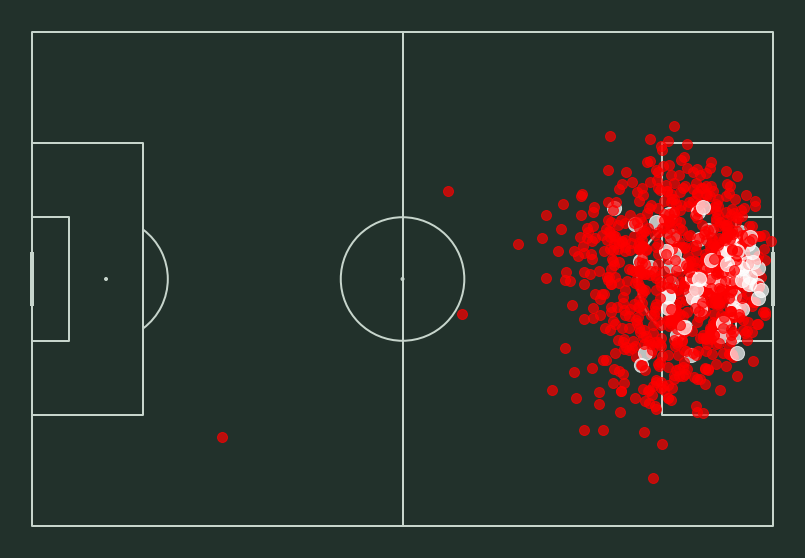

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("UWEURO.xlsx")